<a href="https://colab.research.google.com/github/shayeree96/Complete-Python-3-Bootcamp/blob/master/Cifar-dataset%20CNN%20and%20LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

KeyboardInterrupt: ignored

In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [0]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [0]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
  print('normalized people')
	return train_norm, test_norm

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  print(model.shape)
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
  print(model.shape)
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
  print(model.shape)
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
  print(model.shape)
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
  print(model.shape)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 

In [0]:
# run the test harness for evaluating a model

# load dataset
trainX, trainY, testX, testY = load_dataset()
print(trainX.shape)
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
# fit model
print('trainX.shape[0]',trainX.shape[0])
steps = int(trainX.shape[0] / 64)
print('steps',steps)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=0)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

(50000, 32, 32, 3)
trainX.shape[0] 50000
steps 781


In [0]:
# entry point, run the test harness


KeyboardInterrupt: ignored

In [1]:
'''
Cifar-10 classification
Original dataset and info: https://www.cs.toronto.edu/~kriz/cifar.html for more information
See: https://www.bonaccorso.eu/2016/08/06/cifar-10-image-classification-with-keras-convnet/ for further information
'''
 
from __future__ import print_function

import numpy as np
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical

# For reproducibility
np.random.seed(1000)

if __name__ == '__main__':
    # Load the dataset
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
        pyplot.imshow(X_train[i])
    # show the figure
    pyplot.show()

    # Create the model
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train / 255.0, to_categorical(Y_train),
              batch_size=64,
              shuffle=True,
              epochs=250,
              validation_data=(X_test / 255.0, to_categorical(Y_test)))    #callbacks=[EarlyStopping(min_delta=0.0001, patience=3)]

    # Evaluate the model
    scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))

    print('Loss: %.3f' % scores[0])
    print('Accuracy: %.3f' % scores[1])


def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 # fit model
history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=0)
# learning curves
#summarize_diagnostics(history)

Using TensorFlow backend.


170500096/170498071 [==============================] - 14s 0us/step


NameError: ignored

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)
X_val shape: (1000, 32, 32, 3)
Y_val shape: (1000, 1)


X_train raw shape: (49000, 32, 32, 3)
y_train_raw shape: (49000, 1)
 X_val_raw shape: (1000, 32, 32, 3)
y_val_raw shape: (1000, 1)
 X_test_raw shape: (10000, 32, 32, 3)
y_test_raw shape: (10000, 1)


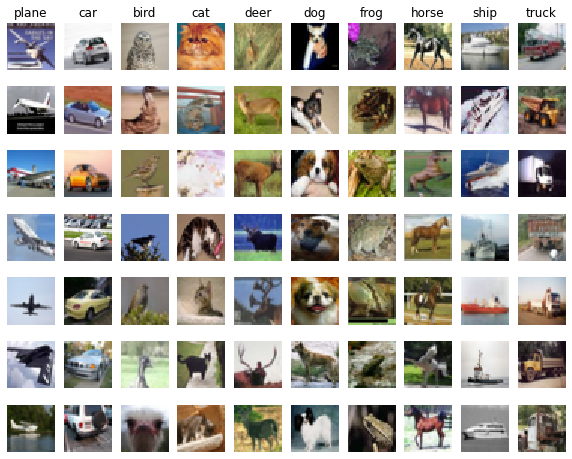



Train data shape:  (3073, 10000)
Validation data shape:  (3073, 1000)
Test data shape:  (3073, 3000)
Epoch:  0  Training Accuracy: 19.950000000000003
Epoch:  1  Training Accuracy: 24.09
Epoch:  2  Training Accuracy: 27.38
Epoch:  3  Training Accuracy: 30.48
Epoch:  4  Training Accuracy: 33.339999999999996
Epoch:  5  Training Accuracy: 35.510000000000005
Epoch:  6  Training Accuracy: 37.3
Epoch:  7  Training Accuracy: 38.82
Epoch:  8  Training Accuracy: 40.510000000000005
Epoch:  9  Training Accuracy: 41.78
Epoch:  10  Training Accuracy: 42.95
Epoch:  11  Training Accuracy: 44.13
Epoch:  12  Training Accuracy: 45.07
Epoch:  13  Training Accuracy: 46.050000000000004
Epoch:  14  Training Accuracy: 47.0
Epoch:  15  Training Accuracy: 47.870000000000005
Epoch:  16  Training Accuracy: 48.699999999999996
Epoch:  17  Training Accuracy: 49.38
Epoch:  18  Training Accuracy: 50.06
Epoch:  19  Training Accuracy: 50.580000000000005
Epoch:  20  Training Accuracy: 51.190000000000005
Epoch:  21  Tra

IndexError: ignored

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 23 18:28:39 2020

@author: shayereesarkar
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 23 12:56:57 2020

@author: shayereesarkar
"""

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 23 12:13:48 2020

@author: shayereesarkar
"""
from sklearn.metrics import accuracy_score
import random 
import numpy as np
import matplotlib.pyplot as plt
import os
import _pickle as pickle
from sklearn.metrics import accuracy_score
# This is a bit of magic gto make matplotlib figures appear inline
# in the notebook rather than in a new window
#matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

from keras.datasets import cifar10
#from algorithms.data_utils import load_CIFAR10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def get_CIFAR10_data(num_training=49000, num_val=1000, num_test=10000, show_sample=True):
    """
    Load the CIFAR-10 dataset, and divide the sample into training set, validation set and test set
    """

    #cifar10_dir = 'datasets/datasets-cifar-10/cifar-10-batches-py/'
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    print('X_train shape:',X_train.shape)
    print('Y_train shape:',y_train.shape)
    print('X_test shape:',X_test.shape)
    print('Y_test shape:',y_test.shape)
        
    # subsample the data for validation set
    mask = range(num_training, num_training + num_val)
    X_val = X_train[mask]
    y_val = y_train[mask]
    
    print('X_val shape:',X_val.shape)
    print('Y_val shape:',y_val.shape)
    
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    '''
    print('X_mask shape:', X_train.shape)
    print('Y_mask shape:',y_train.shape)
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    print('X_test shape:', X_test.shape)
    print('Y_test shape:',y_test.shape)
    '''
    return X_train, y_train, X_val, y_val, X_test, y_test


def visualize_sample(X_train, y_train, classes, samples_per_class=7):
    """visualize some samples in the training datasets """
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        #print('y and cls:',y,cls)
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        #print(idxs)
        for i, idx in enumerate(idxs): # plot the image one by one
            #print(i,idx)
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            #print('plt index:',plt_idx)
            plt.subplot(samples_per_class, num_classes, plt_idx)#subplot(nrows, ncols, index, **kwargs)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()
    
def preprocessing_CIFAR10_data(X_train, X_val, X_test):
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1)) # [49000, 3072]
    X_val = np.reshape(X_val, (X_val.shape[0], -1)) # [1000, 3072]
    X_test = np.reshape(X_test, (X_test.shape[0], -1)) # [10000, 3072]
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image.astype('uint8')
    X_val -= mean_image.astype('uint8')
    X_test -= mean_image.astype('uint8')
    
    # Add bias dimension and transform into columns
    #print('Before adding bias shape of Xtrain:',X_train.shape)
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]).T
    #print('After adding bias shape of Xtrain:',X_train.shape)
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]).T
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]).T
    return X_train, X_val, X_test


# Invoke the above functions to get our data
(X_new,Y_new),(X__new_test,Y_new_test)=cifar10.load_data()
X_train_raw, y_train_raw, X_val_raw, y_val_raw, X_test_raw, y_test_raw = get_CIFAR10_data()

print('\n')
print('X_train raw shape:',X_train_raw.shape)
print('y_train_raw shape:',y_train_raw.shape)
print(' X_val_raw shape:', X_val_raw.shape)
print('y_val_raw shape:',y_val_raw.shape)
print(' X_test_raw shape:', X_test_raw.shape)
print('y_test_raw shape:',y_test_raw.shape)
new_Y_RAW=y_train_raw
#print(X_train_raw[:100])
visualize_sample(X_train_raw, y_train_raw, classes)

X_train, X_val, X_test = preprocessing_CIFAR10_data(X_train_raw, X_val_raw, X_test_raw)
X_train=np.divide(X_train,255)
max_x=range(10000)
X_train=X_train[:,max_x]
X_val=np.divide(X_val,255)
max_test=range(3000)
X_test=np.divide(X_test,255)
X_test=X_test[:,max_test]
#Y_pred_before_LR=y_train
# As a sanity check, we print out th size of the training and test data dimenstion
print('\n')
print('Train data shape: ', X_train.shape)
#print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
#print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
#print('Test labels shape: ', y_test.shape)

J_entropy_train=[]
Accuracy_train=[]
w=np.zeros((len(classes),X_train.shape[0]))
#w=np.random.uniform(-0.1,0.1,(len(classes),X_train.shape[0]))
epochs=200
gamma=0.001#learning rate

def Cross_Entropy_Backward(y_actual,y_pred,J):
    gy=np.zeros((len(y_pred),1))
    
    for i in range(0,len(y_pred)):
        gy[i,0]=-y_actual[i]/y_pred[i]
        
    return gy      


def Softmax_Backward(b,y_pred):
    gb=np.zeros((len(y_pred),len(y_pred)))
#    gb_vec=np.matmul(y_pred,(1-y_pred))
    for i in range(0,len(y_pred)):
        for j in range(0,len(y_pred)):
            if(i==j):
                 gb[i,j]=(y_pred[j]*(1-y_pred[j]))
            else:
                gb[i,j]=-y_pred[j]*y_pred[i]
        
    return gb  

def Linear_Backward(x):
    dw=x
  
    return dw

for item in range(epochs):# For every epochs
    y_label=[]
    count=-1
    J=0
    for example in np.transpose(X_train):# For every example
        count+=1
        #Forward Propagation
        b=np.matmul(example,np.transpose(w))
        #k.append(np.exp(b)/np.exp(np.sum(b)))
        y_pred=np.zeros((len(classes),1))
        for i in range(0,len(classes)):
                
                y_pred[i]=np.exp(b[i])/np.sum(np.exp(b))
                       
        #y_pred=np.exp(b)/np.exp(np.sum(b))#Y_predicted
        
        y_actual=np.zeros((len(classes),1))
        y_actual[y_train_raw[count,0]]=1# Y_real
        J=np.multiply(y_actual,np.log(y_pred))#Cross_entropy at every term
        
        #Backward Propagation 
        dy_pred=Cross_Entropy_Backward(y_actual,y_pred,J)#Dimension is 10X1       
        db=Softmax_Backward(b,y_pred)#This dimension is 10X10       
        dw=Linear_Backward(example)#This dimension is 3073X1
        
        dw=np.reshape(dw,(len(dw),1))
        gradient=np.transpose(np.matmul(dw,np.matmul(np.transpose(dy_pred),db)))
        w=w-gamma*gradient
            
    count=-1    
    for example in np.transpose(X_train):# For every example
        count+=1
        #Forward Propagation
        b=np.matmul(example,np.transpose(w))
        #k.append(np.exp(b)/np.exp(np.sum(b)))
        y_pred=np.zeros((len(classes),1))
        for i in range(0,len(classes)):
                
                y_pred[i]=np.exp(b[i])/np.sum(np.exp(b))

        y_actual=np.zeros((len(classes),1))
        y_actual[y_train_raw[count,0]]=1# Y_real
        y_label.append(np.argmax(y_pred))
        J+=np.sum(np.multiply(y_actual,np.log(y_pred)))#Cross_entropy at every term 
    J_entropy_train.append(J/10000)    
    acc=accuracy_score(y_train_raw[:10000], y_label)
    Accuracy_train.append(acc)
    print('Epoch: ',item,' Training Accuracy:', acc*100)    

#validation
    
def predict(w,X):
    count=-1
    y_label=[]
    for example in np.transpose(X):# For every example
        count+=1
        #Forward Propagation
        b=np.matmul(example,np.transpose(w))
        y_pred=np.zeros((len(classes),1))
        
        y_pred=np.exp(b)/np.sum(np.exp(b))
        y_actual=np.zeros((len(classes),1))
        y_actual[y_val_raw[count,0]]=1# Y_real
        J=np.multiply(y_actual,np.log(y_pred))#Cross_entropy at every term
        y_label.append(np.argmax(y_pred))
        
    return y_label     
        
ypredval=predict(w,X_val)
acc_validation=accuracy_score(y_val_raw, ypredval)
print('validation accuracy', acc*100)

ypredtest=predict(w,X_test)
acc_test=accuracy_score(y_test_raw, ypredtest)
print('test accuracy', acc*100)
